# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets. You will be graded based on a combination of your code producing the expected results, your written responses to the questions and a passing leaderboard score in the final exercise.

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them. You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [1]:
# Importing the dataset
from sklearn import datasets
digits = datasets.load_digits();

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

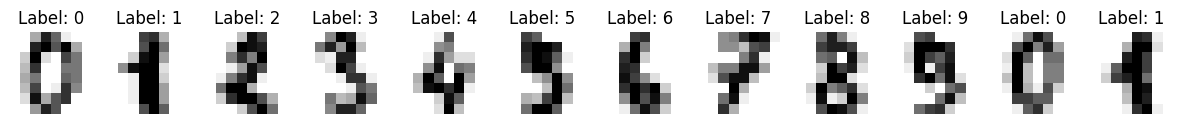

In [2]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets, with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.
Check out the documentation to figure out how to set the parameters to get the desired split. 

In [3]:
# INSERT YOUR CODE HERE. ASSIGN TO THE FOLLOWING VARIABLES, X_train, X_val, X_test, y_train, y_val, y_test
# >
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already. We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [4]:
# CALCULATE AND WRITE YOUR ANSWERS HERE
# >
#Amount of images in training, validation and test set respectively
print('Images in training set: ', len(X_train))
print('Images in validation set: ', len(X_val))
print('Images in test set: ', len(X_test))

#Distribution of labels in training data
train_label_distribution = {label: y_train.tolist().count(label) for label in set(y_train)}
print("Training Label Distribution:", train_label_distribution)



Images in training set:  1437
Images in validation set:  180
Images in test set:  180
Training Label Distribution: {0: 151, 1: 147, 2: 141, 3: 154, 4: 151, 5: 142, 6: 137, 7: 140, 8: 135, 9: 139}


From the output above we see that there are 1437 images in the training set, 180 in the validation set and
180 in the test set.

From the computation of the class distribution in the training set,
it is seen that the distribution is quite balance, i.e. no classes are over/under-represented.

### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression. We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it. We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

LinearRegression MSE:  4.3195902478008
LinearRegression accuracy:  0.25


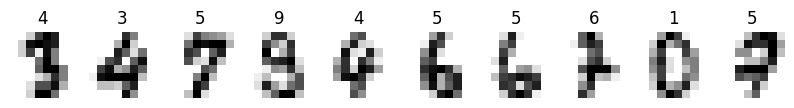

In [5]:
# DEFINE A LinearRegression MODEL USING SKLEARN. ASSIGN THE MODEL TO THE VARIABLE model.
# >
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np


model = LinearRegression()
# FIT THE MODEL AND MAKE PREDICTIONS ON THE TEST SET. ASSIGN THE PREDICTIONS TO THE VARIABLE y_pred.
# >

#Fitting model to training data
model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = model.predict(X_test)
# ASSIGN YOUR MODEL'S TEST SET MSE TO THE VARIABLE mse AND ITS ACCURACY TO THE VARIABLE acc.
# >
mse = mean_squared_error(y_test, y_pred)

def accuracy(predicted_labels, true_labels):
    '''Accuracy function that returns the percentage of correctly predicted labels'''
    rounded_predictions = np.round(predicted_labels)
    correct_predictions = np.sum(rounded_predictions == true_labels)
    return correct_predictions/len(true_labels)

acc = accuracy(y_pred, y_test)
# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again, check out the documentation to see how to use it. Fit the model and make predictions on the test set. 

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image), but for a different model this time.

LogisticRegression accuracy:  0.9666666666666667


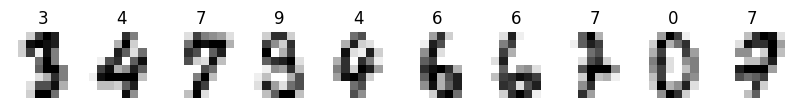

In [6]:
# YOUR CODE HERE
# >
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# DO NOT INSERT OR CHANGE ANYTHING BELOW
# print("LogisticRegression MSE: ", mse)
print("LogisticRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)


### Written Questions

1a) Describe the trends you observe in the results. Is there anything interesting or unexpected? 

1b) How do the results compare to the linear regression model? 

1c) What do you think is the reason for this?

### Answers

1a)
The trends we see when using the logistic regression model on the MNIST data is as expected.
Mainly that the the model predicts the label quite good with an accuracy of 0.96 meaning that 
it only fails to classify in a very small set of cases. This is what we would expect, since
logistic regression is used for a classification task such as this.

1b)
The results of the logistic regression model is much better than those of the
linear regression model.

1c)
The reason for the results being better in the logistic regression model compared
to the linear regression model is that, as mentioned above that logistic regression typically
is used for classification tasks, that this is (trying to predict a label from the input) and that
linear regression mainly is used for regression tasks (trying to predict a value from the input).

## Exercise 3.2: Counting stars

Your team is tasked with applying data science and machine learning techniques to some recently collected telescope image data. The telescope takes low resolution images, in which stars either appear as squares or circles. Your task is to train a classifier to determine whether there are more circular stars than square stars in each image. The budget is tight this year so there are no resources available to train expensive deep neural networks; you will need to train a linear or logistic regression classifier instead.

You are encouraged to be creative, and to try out different things empirically, too. Preprocessing could be crucial to the success of your model. Good luck!

Below is a sample of the data you'll be working with. Above each image is the label, which shows the number of circular and square stars, respectively. We do not count the small noisy background stars. 

![](sample.png)

### D: Programming Exercise

1. Create an account on Kaggle to collect the data https://www.kaggle.com/competitions/gds-exercise-3/. You can either use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the training data from https://www.kaggle.com/competitions/gds-exercise-3/data. Check out the Dataset Description for more information about the data and your task.
2. Load the training data file `stars_train_X_y.npz` and split it into `train`, `val`, and `test` splits.
3. Use a linear or logistic regression model to fit the `train` data. Use the `val` and `test` splits for model selection and hyperparameter optimization. (You should measure performance using accuracy).

In [19]:
# YOUR CODE HERE
# >

#MY KAGGLE USERNAME IS: emilbentinrum
import numpy as np

#Loading in data
data = np.load('stars_train_Xy.npz')
#Splitting into feature and target data
X = data['X_train'] #   np.ndarray of size (8000, 4096),  flattened image (64x64) of the night sky.
y = data['y_train'] #   np.ndarray of size (8000, 2), number of circular stars and number square stars.
y = y[:, 0]>y[:, 1]

The preprocessed target data has been "flattened" to only contain one element instead of two.
That is, the boolean value of the following statement: "There are more circular stars than square stars"
The result array is an array that contains the result of - for each row in the original data -
evaluating the above statement (i.e. compares the two columns).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [9]:
linearModel = LinearRegression().fit(X_train, y_train)
y_pred = linearModel.predict(X_val)
acc = accuracy(y_pred, y_val)
print('Accuracy of linear model on validation data: ', acc)

Accuracy of linear model on validation data:  0.4425


In [10]:
logisticModel = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = logisticModel.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print('Accuracy of logistic model on validation data: ', acc)

Accuracy of logistic model on validation data:  0.505


As expected - like in the previous exercise - the model which performs the best, is the logistic regression
model since we are dealing with a classification problem. Thus, we continue to explore this below:

The below cell preprocesses the data as follows:
The preprocessed feature data consists of - for each sample - the sum of all the pixels that was
set to 1.0 (i.e. those that make up square stars) as the first column and the sum
of all pixels that was set to 2.0 (i.e. those that make up circular stars) as the second column.

In [11]:
#Preprocessing data:
X_mod = np.column_stack((np.sum(X == 1.0, axis=1), np.sum(X == 2.0, axis=1)))

In [12]:
#Splitting the preprocessed data into train, val, test splits:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

Accuracy on validation data:  0.9225


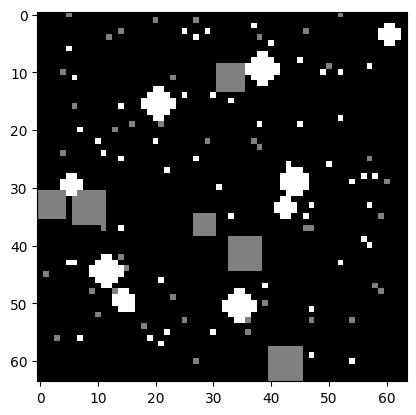

In [13]:
plt.imshow(X[0].reshape(64,64), cmap='gray')

#Fitting logistic regression model to the preprocessed data
logisticModel2 = LogisticRegression().fit(X_train, y_train)

y_pred = logisticModel2.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print('Accuracy on validation data: ', acc)

# y_pred1 = logisticModel2.predict(X_test)

# #Checking prediction percentage on the test data
# acc1 = accuracy_score(y_test, y_pred1)
# print('Accuracy on test data: ', acc1)

In [14]:
#Hyperparameter tuning using gridseach and cross-validation
from sklearn.model_selection import GridSearchCV

#This is one of the only set of parameters that make sense to test together.
#The only solver for logistic regression that work with both L1 and L2 penalty is the liblinear solver
#so that we will use and test together with different values of C
params_grid = {
    'solver' : ['liblinear'],
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10]
}

gs_cv = GridSearchCV(logisticModel2, params_grid, scoring='accuracy', cv=5)

gs_cv.fit(X_train, y_train)

best_params = gs_cv.best_params_
best_score = gs_cv.best_score_
print('Best parameters for logistic regression model: ', best_params)
print('Best score: ', best_score)

Best parameters for logistic regression model:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.92640625


### E: Unlabelled data evaluation

You should download the unlabeled test data from https://www.kaggle.com/competitions/gds-exercise-3/data and make predictions for all of the unlabeled images in the test set. You can submit your best predictions to Kaggle three times/day.

The course responsible has submitted a naive baseline and we're sure you can beat that score! This programming exercise is considered passed if you achieve  $\text{Score} \ge 0.85$ on the leaderboard.

In [17]:
#Initializing best performing model with appropriate hyperparameters:
logisticModel_final = LogisticRegression(penalty='l2', C=0.1, solver='liblinear').fit(X_train, y_train)

In [18]:
# LOAD THE TEST SET AND MAKE PREDICTIONS. ASSIGN THE PREDICTIONS TO THE VARIABLE y_pred.
# >

#Loading unlabeled test data
data = np.load('stars_test_X.npz')
X_test = data['X_test']

#Preprocessing unlabeled test data to be able to use our logistic regression model on it
square_pixels_test = np.sum(X_test == 1.0, axis=1)
star_pixels_test = np.sum(X_test == 2.0, axis=1)
X_test_mod = np.column_stack((square_pixels_test, star_pixels_test))

y_pred = logisticModel_final.predict(X_test_mod)

output_file = "prediction.csv"
# DO NOT INSERT OR CHANGE ANYTHING BELOW
import numpy as np
# Use this function to save your predictions on stars_test_X.npz to a "prediction.csv" file.
# The produced csv file can be directly uploaded to Kaggle for evaluation.
def y_pred_to_kaggle_format (y_pred : np.ndarray) -> None:
    np.c_[np.arange(1, len(y_pred)+1), y_pred]
    np.savetxt(output_file, np.c_[np.arange(1, len(y_pred)+1), y_pred], fmt='%i', delimiter=",", header="Id,Category", comments='')

y_pred_to_kaggle_format(y_pred)

# NOW YOU CAN UPLOAD THE prediction.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

2b) Which techniques were not useful in improving performance on this task?

### 2a) and 2b) answers
In programming exercise D i initially start with testing whether a linear or logistic regression
model will perform best on the original data with sklearns default hyperparameter settings.
I conclude that logistic regression model works best, for a classification problem like this and proceed
to look into how i can improve the performance by preprocessing the data.

The original data contains a lot of features that do not contribute to what the purpose of the model should be/ what the model should predict.
Namely, that it should decide whether there are more square stars or circular stars in an image. So the
purpose of the preprocess step i did was to remove all the pixels that has the least impact on the amount
of square and/or circular stars. This is the 0.0/black pixels. Thus, the new input for my logistics regression model
became one with two features describing the amount of 1.0 and 2.0 pixels in an image respectively.

This preprocess of the data provided the biggest improvement in accuracy - a jump from approx. 0.505 to 0.92.

After this i do some hyperparameter tuning of my model using gridsearch. I only iterate over a select few parameters
of the logisitic regression model, but the reason for this is that not all parameters are compatible (i.e. not every solver works with both penalties and such). This resulted in a minor improvement in accuracy of my model.

The resulting model is a logistic regression model that is trained on preprocessed data like explained above,
with finetuned hyperparameters.

The techniques that were not useful in improving performance was the initial ones. Simply fitting the model to data that had not been
preprocessed, the hyperparameter tuning was not very useful either. 
